In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_style("white")


#import plotly
#import plotly.graph_objs as go

import webcolors
from colorharmonies import Color, complementaryColor, triadicColor, splitComplementaryColor, tetradicColor, analogousColor, monochromaticColor

import cv2 #openCV library

from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import NearestNeighbors

#pd.set_option("display.max_rows", None)

### import photo

In [31]:
def import_photo(name:str): #defines what type to input
    interior_photo = cv2.imread(f"images/{name}.jpg")
    interior_photo = cv2.cvtColor(interior_photo, cv2.COLOR_BGR2RGB)
    return interior_photo #the 3d nparray

In [32]:
import_photo("livingroom1")

array([[[229, 233, 234],
        [229, 233, 234],
        [229, 233, 234],
        ...,
        [222, 226, 225],
        [222, 226, 225],
        [222, 226, 225]],

       [[229, 233, 234],
        [229, 233, 234],
        [229, 233, 234],
        ...,
        [222, 226, 225],
        [222, 226, 225],
        [222, 226, 225]],

       [[230, 234, 235],
        [230, 234, 235],
        [230, 234, 235],
        ...,
        [222, 226, 225],
        [222, 226, 225],
        [222, 226, 225]],

       ...,

       [[223, 225, 224],
        [223, 225, 224],
        [223, 225, 224],
        ...,
        [218, 218, 216],
        [218, 218, 216],
        [218, 218, 216]],

       [[223, 225, 224],
        [223, 225, 224],
        [223, 225, 224],
        ...,
        [218, 218, 216],
        [218, 218, 216],
        [218, 218, 216]],

       [[223, 225, 224],
        [223, 225, 224],
        [223, 225, 224],
        ...,
        [218, 218, 216],
        [218, 218, 216],
        [218, 218, 216]]

### show photo

In [28]:
def show_photo(name:str):
    interior_photo = cv2.imread(f"images/{name}.jpg")
    interior_photo = cv2.cvtColor(interior_photo, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(interior_photo)

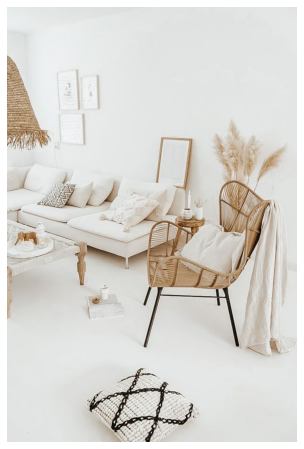

In [29]:
show_photo("livingroom1")

### show photo with color clusters

In [36]:
def clusters_photo(name:str, K=4): #input "name of photo" and amount of clusters
    interior_photo_1 = import_photo(name) #call import_photo function
    pixels = interior_photo_1.reshape((-1,3))

    # convert to np.float32
    pixels = np.float32(pixels)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    #K = 5 
    ret,label,center=cv2.kmeans(pixels,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((interior_photo_1.shape))
    
    plt.figure(figsize=(8,8))
    plt.axis('off')
    
    plt.imshow(res)
    plt.show()

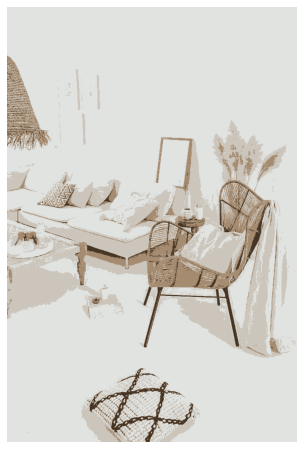

In [37]:
clusters_photo("livingroom1")

### prepare dataframe

#### add R G B colors

In [ ]:
def prepare_dataframe(name):
    interior_photo_1 = import_photo(name)
    interior_photo_2d = interior_photo_1.reshape((-1,3))
    interior_photo_df = pd.DataFrame(data=interior_photo_2d, columns=["Red", "Green", "Blue"])
    return interior_photo_df[["Red", "Green", "Blue"]]

In [34]:
prepare_dataframe("livingroom1")

,Red,Green,Blue
0,229,233,234
1,229,233,234
2,229,233,234
3,229,233,234
4,229,233,234
...,...,...,...
477139,217,219,216
477140,218,218,216
477141,218,218,216
477142,218,218,216


#### add cluster and centroid info

In [141]:
#add fitted clusters as new column "Clusters"
#add centroids e.g. (255, 23, 122) to new column "Centroids"

def df_kmeans(name):
    interior_photo_df = prepare_dataframe(name)
    clusters = KMeans(n_clusters=4) #have to define the amount of clusters already before
    clusters.fit(interior_photo_df)
    
    centroids = [tuple(i) for i in np.round(clusters.cluster_centers_).astype(int)]
    print(centroids)
    
    interior_photo_df = interior_photo_df.assign(Clusters = clusters.labels_) # works
    
    interior_photo_df = interior_photo_df.assign(Centroids = np.nan)

    '''
    interior_photo_df["Centroids"] = np.where(interior_photo_df["Clusters"] == 0, 
                                          clusters.cluster_centers_[0],
                                         (interior_photo_df["Clusters"] == 1, 
                                          clusters.cluster_centers_[1],
                                                                   (interior_photo_df["Clusters"] == 2, 
                                          clusters.cluster_centers_[2],
                                                                    clusters.cluster_centers_[3])))'''

    #interior_photo_df = df.assign(Centroid = centroids) #Length of values (4) does not match length of index (477144)
#    print(clusters.labels_)
#    print(clusters.cluster_centers_)

    #interior_photo_df.loc[interior_photo_df["Clusters"] == 0]["Centroids"] = np.round(clusters.cluster_centers_[0]).astype(int)

                                                                                
    return interior_photo_df

#np where - conditional statmeenet, for loop iterate 4 times



#clusters.cluster_centers_[0]

In [140]:
[tuple(i) for i in np.round(clusters.cluster_centers_).astype(int)]

[(226, 227, 225), (166, 140, 113), (204, 198, 188), (71, 53, 36)]

In [143]:
clusters.cluster_centers_

array([[226.12298395, 227.43923755, 225.47649896],
       [165.50089651, 140.32882631, 113.41133418],
       [204.28699075, 197.91846434, 188.42651055],
       [ 70.57857467,  53.35360872,  36.38874262]])

In [144]:
print(clusters)

KMeans(n_clusters=4)


In [137]:
clusters_test = clusters.cluster_centers_

In [142]:
df_kmeans("livingroom1")

[(204, 198, 188), (226, 227, 225), (166, 140, 113), (71, 53, 36)]


,Red,Green,Blue,Clusters,Centroids
0,229,233,234,1,NaN
1,229,233,234,1,NaN
2,229,233,234,1,NaN
3,229,233,234,1,NaN
4,229,233,234,1,NaN
...,...,...,...,...,...
477139,217,219,216,1,NaN
477140,218,218,216,1,NaN
477141,218,218,216,1,NaN
477142,218,218,216,1,NaN


In [128]:
test_df = df_kmeans("livingroom1")

ValueError: Length of values (3) does not match length of index (342681)

In [132]:
test_df["Clusters"].value_counts()

0    342681
2     89333
1     34088
3     11042
Name: Clusters, dtype: int64

In [ ]:
#def get_centroids(name, K=4):
    df = prepare_dataframe(name)
    clusters = KMeans(K)
    clusters.fit(df)
    centroids = clusters.cluster_centers_
    return np.round(centroids).astype(int)

In [ ]:
#add % of K as new column

#### % of each color